# Your Uni : yh3846, jl6938, rh3243
# Your Full name : Yizhao Hong, Jason Lee, Rick Hua
# Link to your Public Github repository with Final report  : https://github.com/hongyizhao00/Advanced-Machine-Learning-World-Happiness-Classification-Competition


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('sample_data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [31]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
# y_test_labels = ## Complete in a similar manner as above

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [32]:
# Your answer:
y_test_labels = y_test.astype('category').cat.codes


y_train contains categorical string labels (e.g., 'Very Low', 'Low', 'Average', etc.).
y_train_labels contains numerical codes corresponding to these categories (e.g., 0, 1, 2, 3, 4).

<h3> Add new data

In [33]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("sample_data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [34]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.
X_train = X_train.merge(countrydata, left_on='country', right_on='country_name', how='left').drop(columns=['country_name'])
X_test = X_test.merge(countrydata, left_on='country', right_on='country_name', how='left').drop(columns=['country_name'])


In [35]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [8]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?
Data types of most variables are float64 except for country and region.

Find out the number and percentage of missing values in the table per column

In [10]:
missing_values = X_train.isnull().sum()
print(missing_values)
missing_percentage = ((missing_values/len(X_train))*100)
print(missing_percentage)

country                           0
region                            0
gdp_per_capita                    0
social_support                    0
healthy_life_expectancy           0
freedom_to_make_life_choices      0
generosity                        0
perceptions_of_corruption         0
population                        6
population_below_poverty_line    16
hdi                               6
life_expectancy                   7
expected_years_of_schooling       7
mean_years_of_schooling           7
gni                               7
dtype: int64
country                           0.000000
region                            0.000000
gdp_per_capita                    0.000000
social_support                    0.000000
healthy_life_expectancy           0.000000
freedom_to_make_life_choices      0.000000
generosity                        0.000000
perceptions_of_corruption         0.000000
population                        6.315789
population_below_poverty_line    16.842105
hdi              

Plot the frequency distribution / histogram of some of the numerical features that you think are important

In [13]:
X_train['social_support'].describe()

,social_support
count,95.000000
mean,1.157674
std,0.331683
min,0.000000
25%,0.962500
50%,1.227000
75%,1.383000
max,1.620000


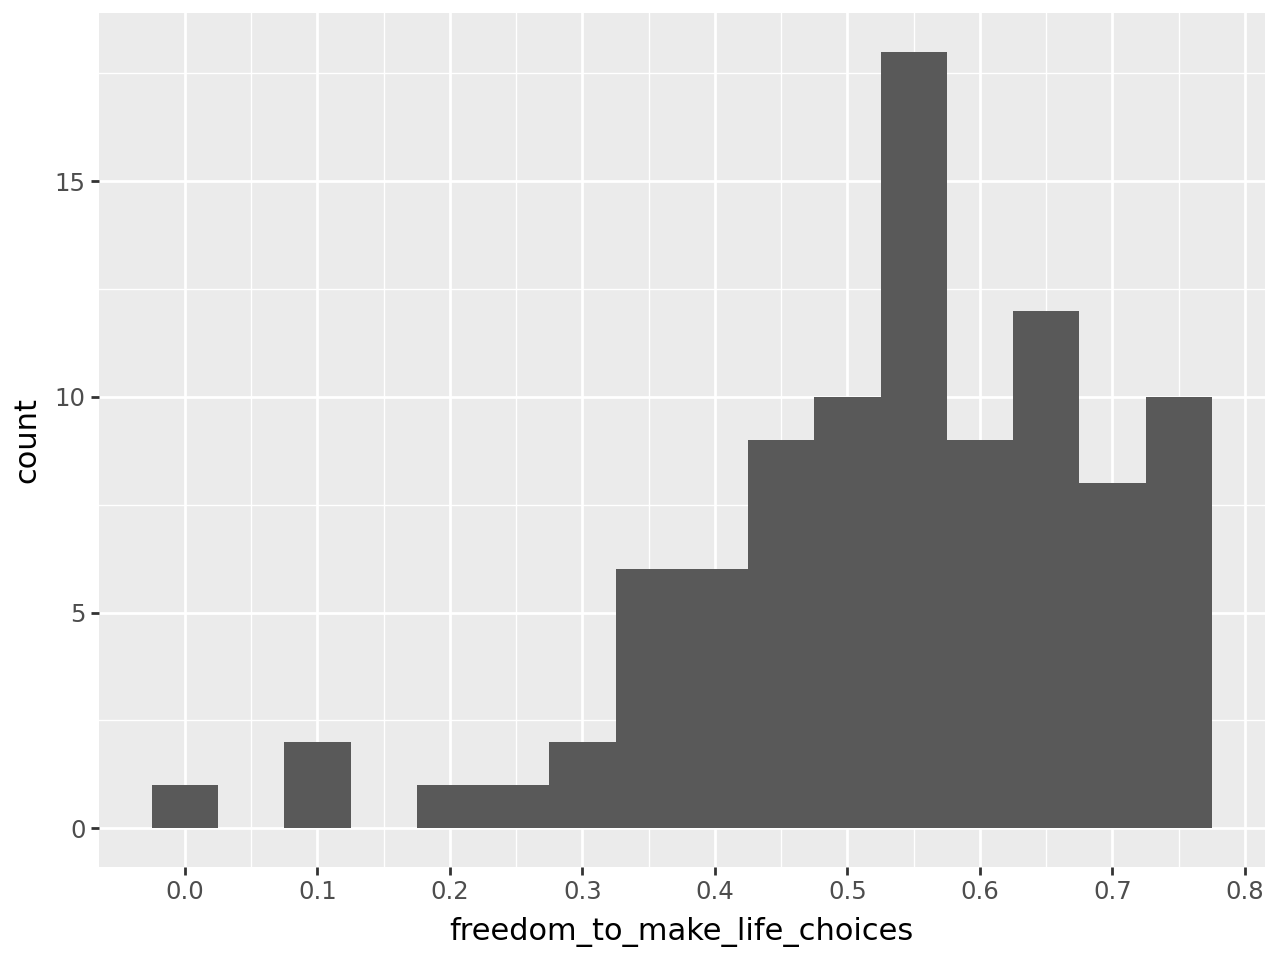

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 7 rows containing non-finite values.


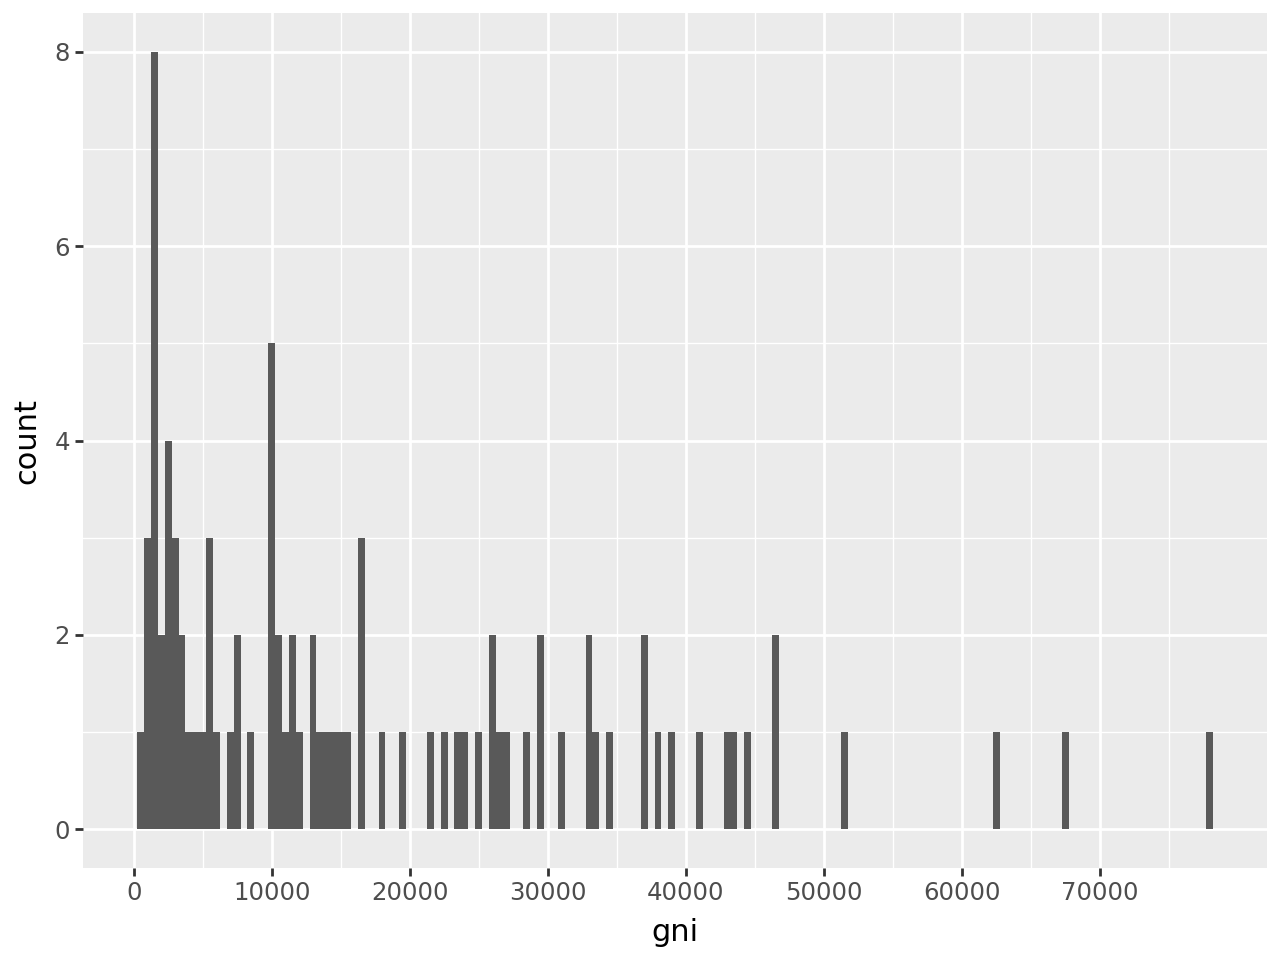

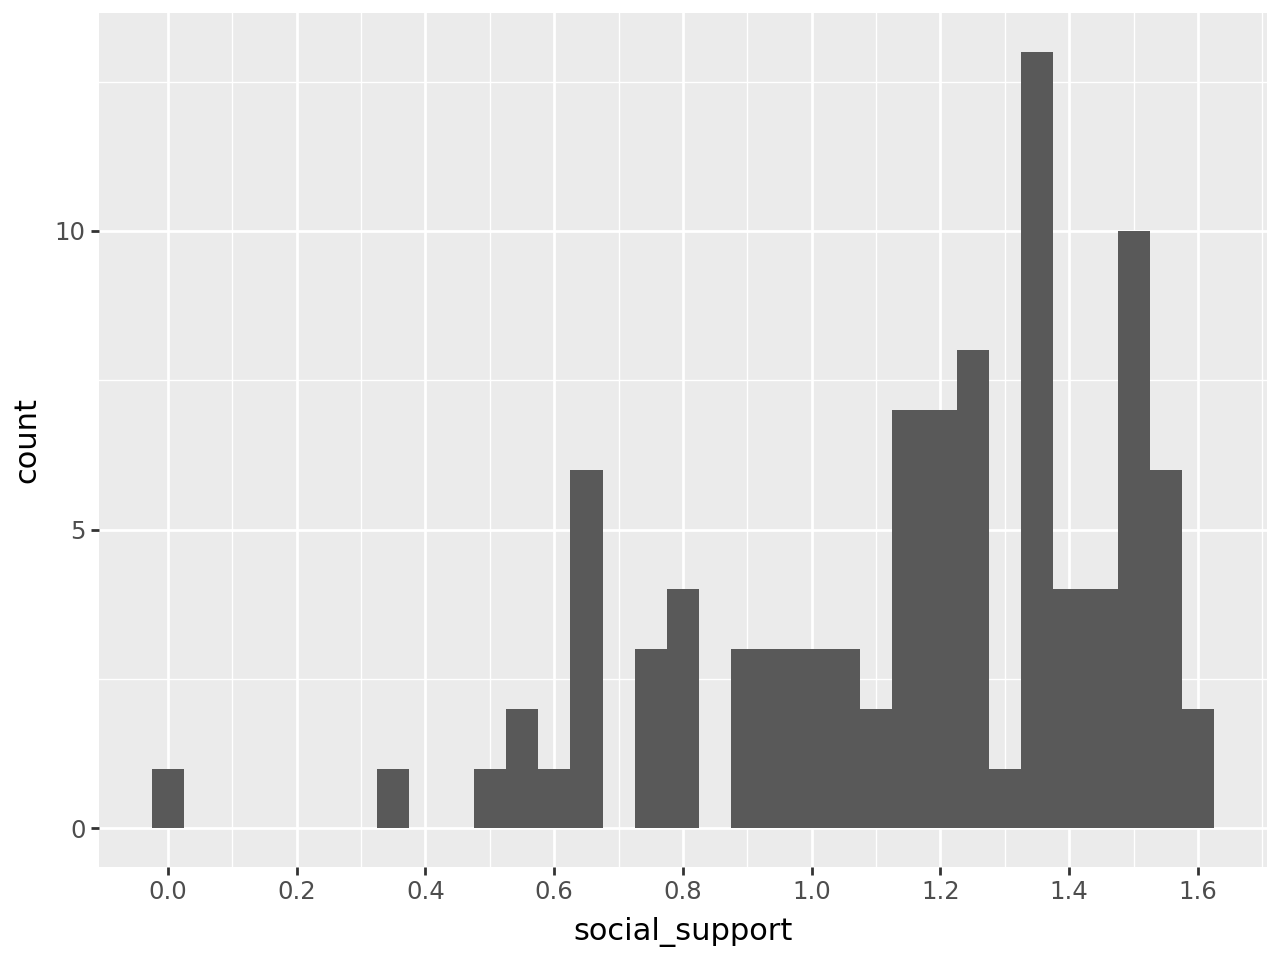

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 7 rows containing non-finite values.


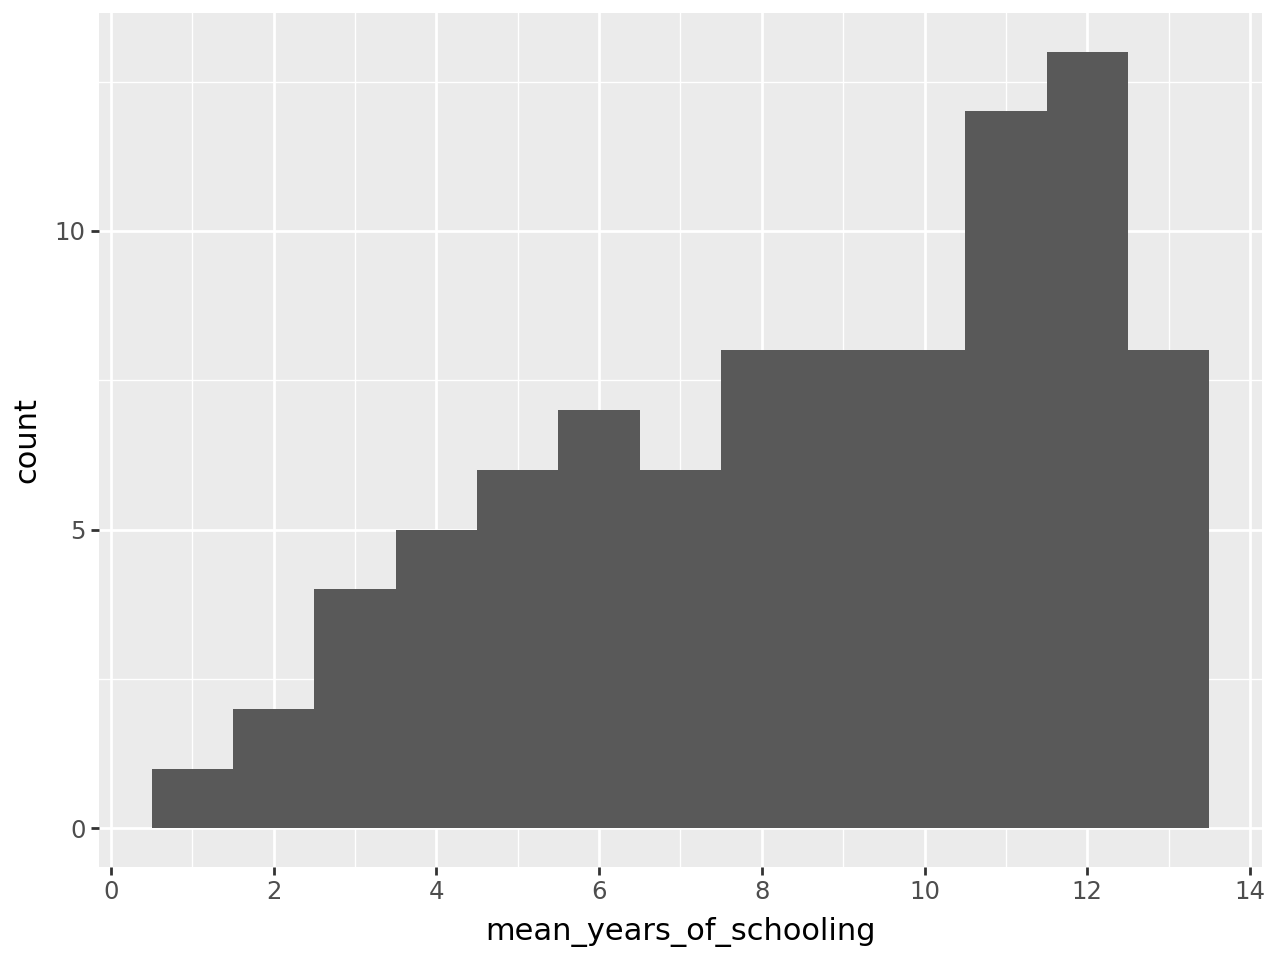

In [14]:
from plotnine import ggplot, aes, geom_histogram, scale_x_continuous, theme_minimal
import numpy as np

plot_freedom_to_make_life_choices = (ggplot(X_train, aes(x = 'freedom_to_make_life_choices')) +
geom_histogram(binwidth = 0.05) +
scale_x_continuous(breaks=np.arange(0, 1, 0.1)))

plot_gni = (ggplot(X_train, aes(x = 'gni')) +
geom_histogram(binwidth = 500) +
scale_x_continuous(breaks=np.arange(0, 80000, 10000)))

plot_social_support = (ggplot(X_train, aes(x = 'social_support')) +
geom_histogram(binwidth = 0.05) +
scale_x_continuous(breaks=np.arange(0, 2, 0.2)))

plot_mean_years_of_schooling = (ggplot(X_train, aes(x = 'mean_years_of_schooling')) +
geom_histogram(binwidth = 1) +
scale_x_continuous(breaks=np.arange(0, 16, 2)))

display(plot_freedom_to_make_life_choices)
display(plot_gni)
display(plot_social_support)
display(plot_mean_years_of_schooling)


Plot the categorical variables and their distribution

happiness_category
Very Low     19
Low          19
Average      19
High         19
Very High    19
Name: count, dtype: int64


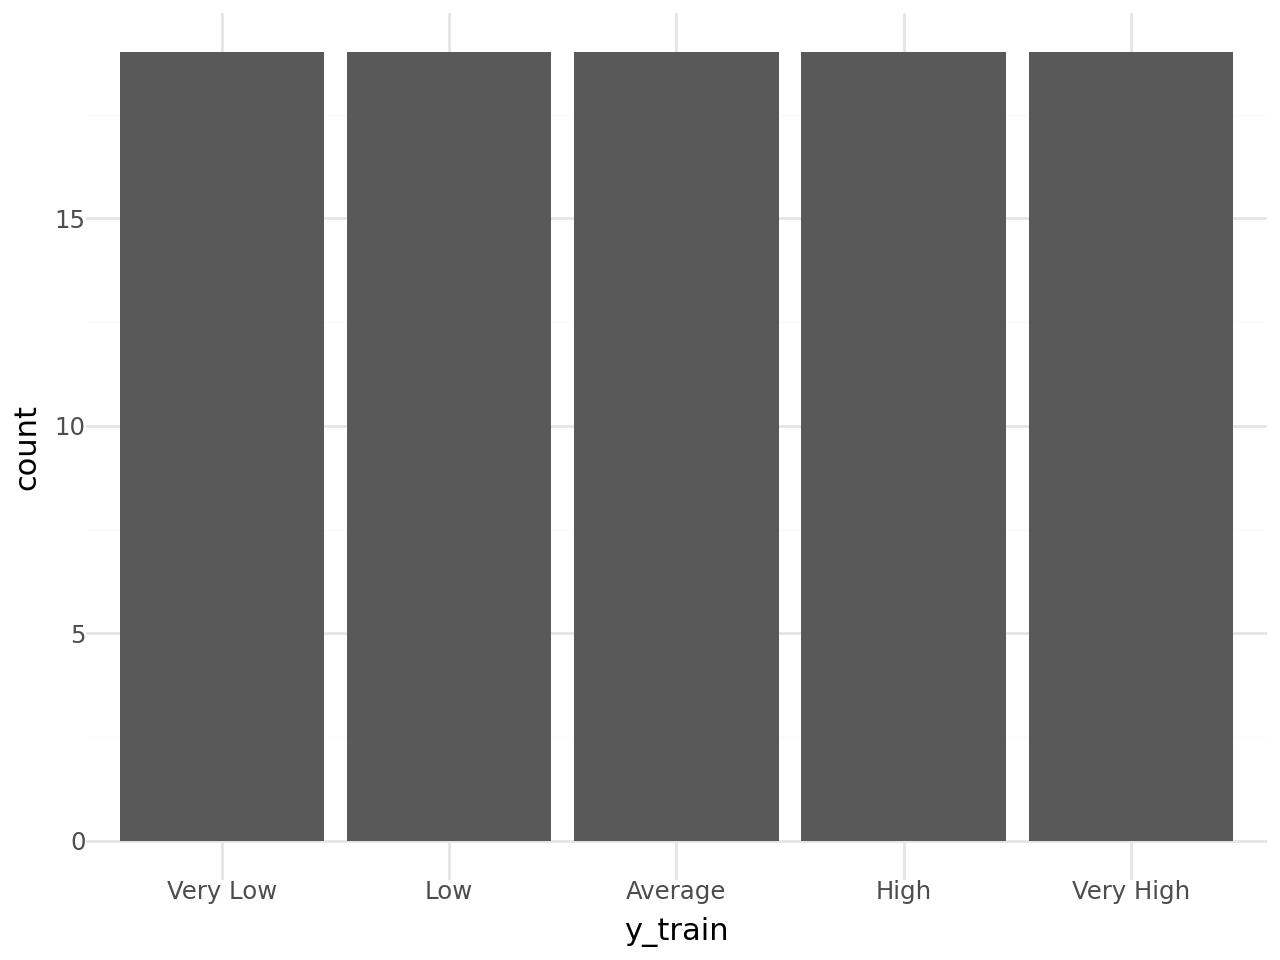

happiness_category
Very Low     9
Very High    9
Low          8
Average      8
High         8
Name: count, dtype: int64


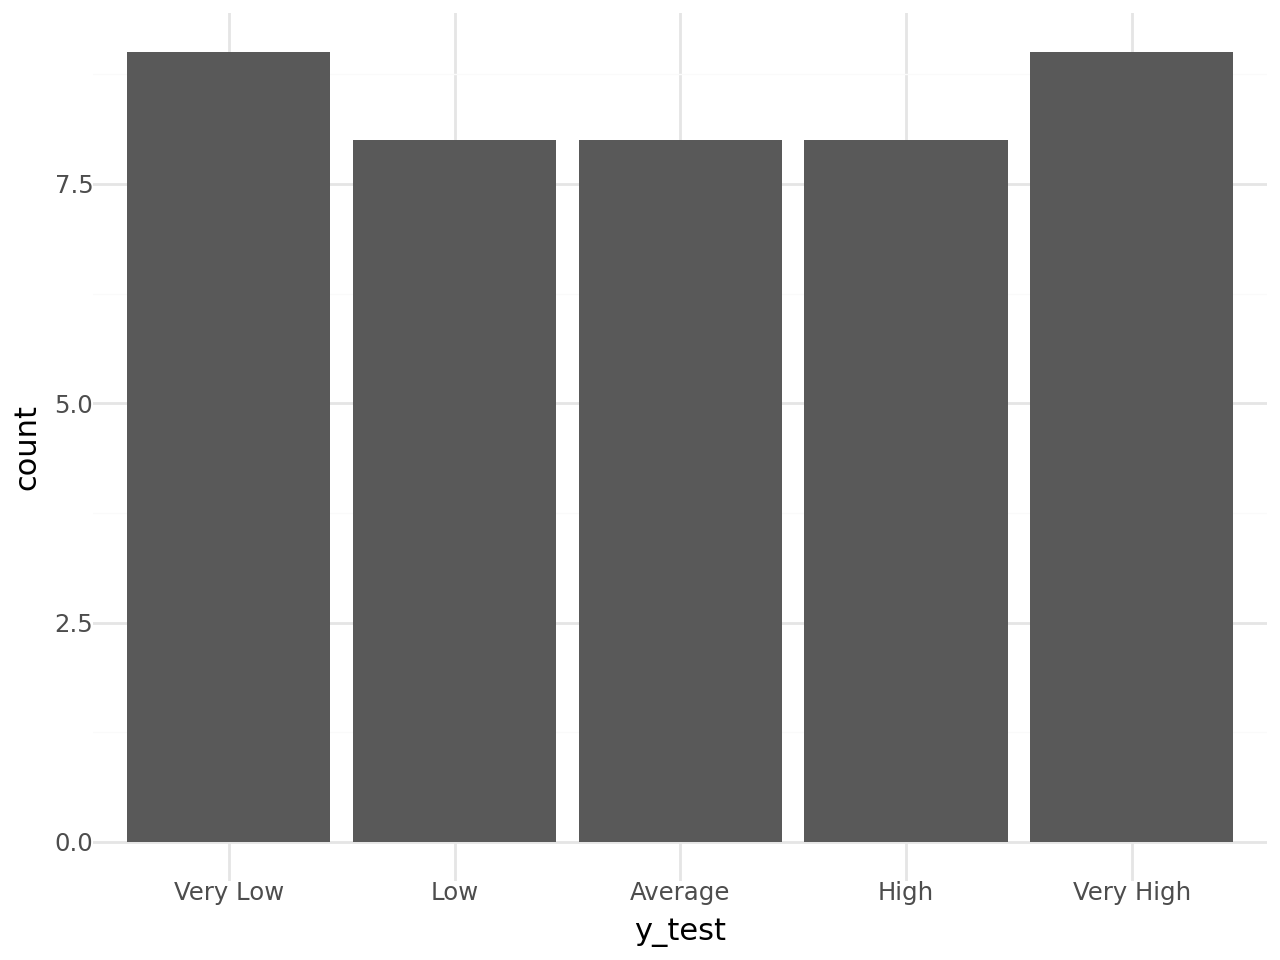

In [15]:
from plotnine import ggplot, aes, geom_bar, theme_minimal

plot_y_train = (ggplot(y_train.to_frame(), aes(x="y_train")) +
                geom_bar() +
                theme_minimal())

plot_y_test = (ggplot(y_test.to_frame(), aes(x="y_test")) +
                geom_bar() +
                theme_minimal())

print(y_train.value_counts())
display(plot_y_train)
print(y_test.value_counts())
display(plot_y_test)


Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation
correlation_matrix = X_train.drop(columns=['country', 'region']).corr(method='spearman')
print(correlation_matrix)

                               gdp_per_capita  social_support  \
gdp_per_capita                       1.000000        0.813643   
social_support                       0.813643        1.000000   
healthy_life_expectancy              0.892963        0.751340   
freedom_to_make_life_choices         0.510007        0.539728   
generosity                          -0.076316        0.062092   
perceptions_of_corruption            0.378969        0.228984   
population                          -0.292427       -0.357605   
population_below_poverty_line       -0.650409       -0.624048   
hdi                                  0.947752        0.869633   
life_expectancy                      0.892390        0.781908   
expected_years_of_schooling          0.875734        0.871439   
mean_years_of_schooling              0.847389        0.876159   
gni                                  0.966186        0.833230   

                               healthy_life_expectancy  \
gdp_per_capita                 

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

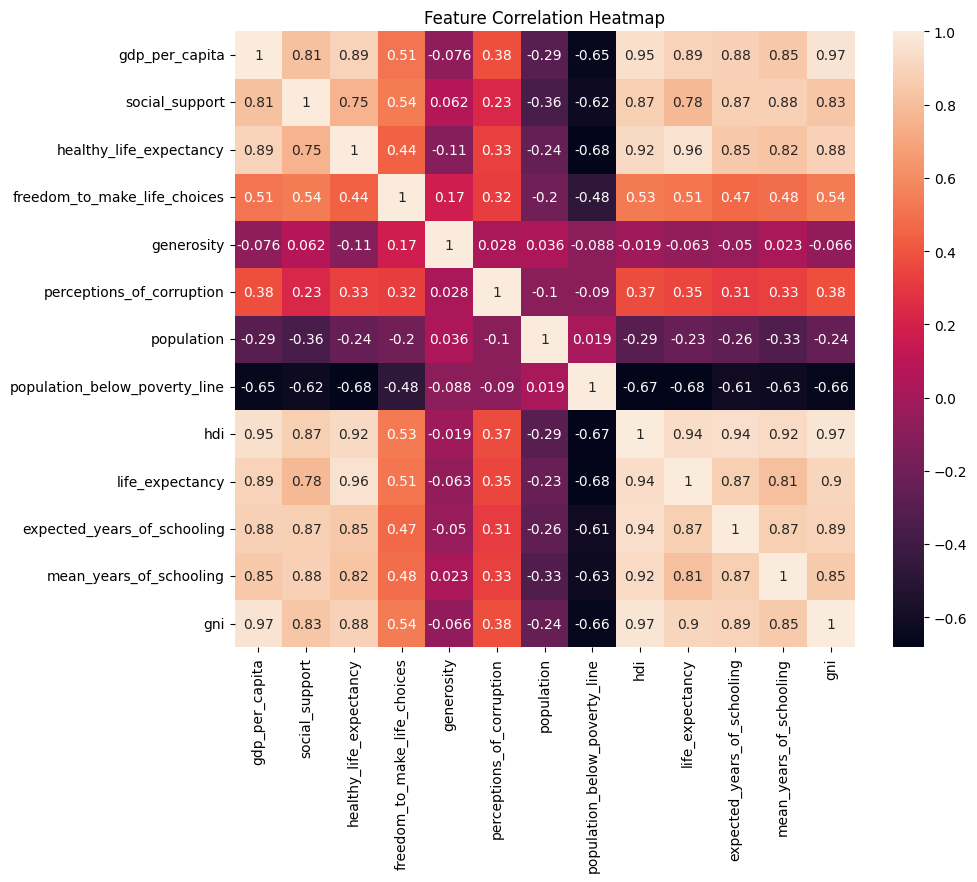

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

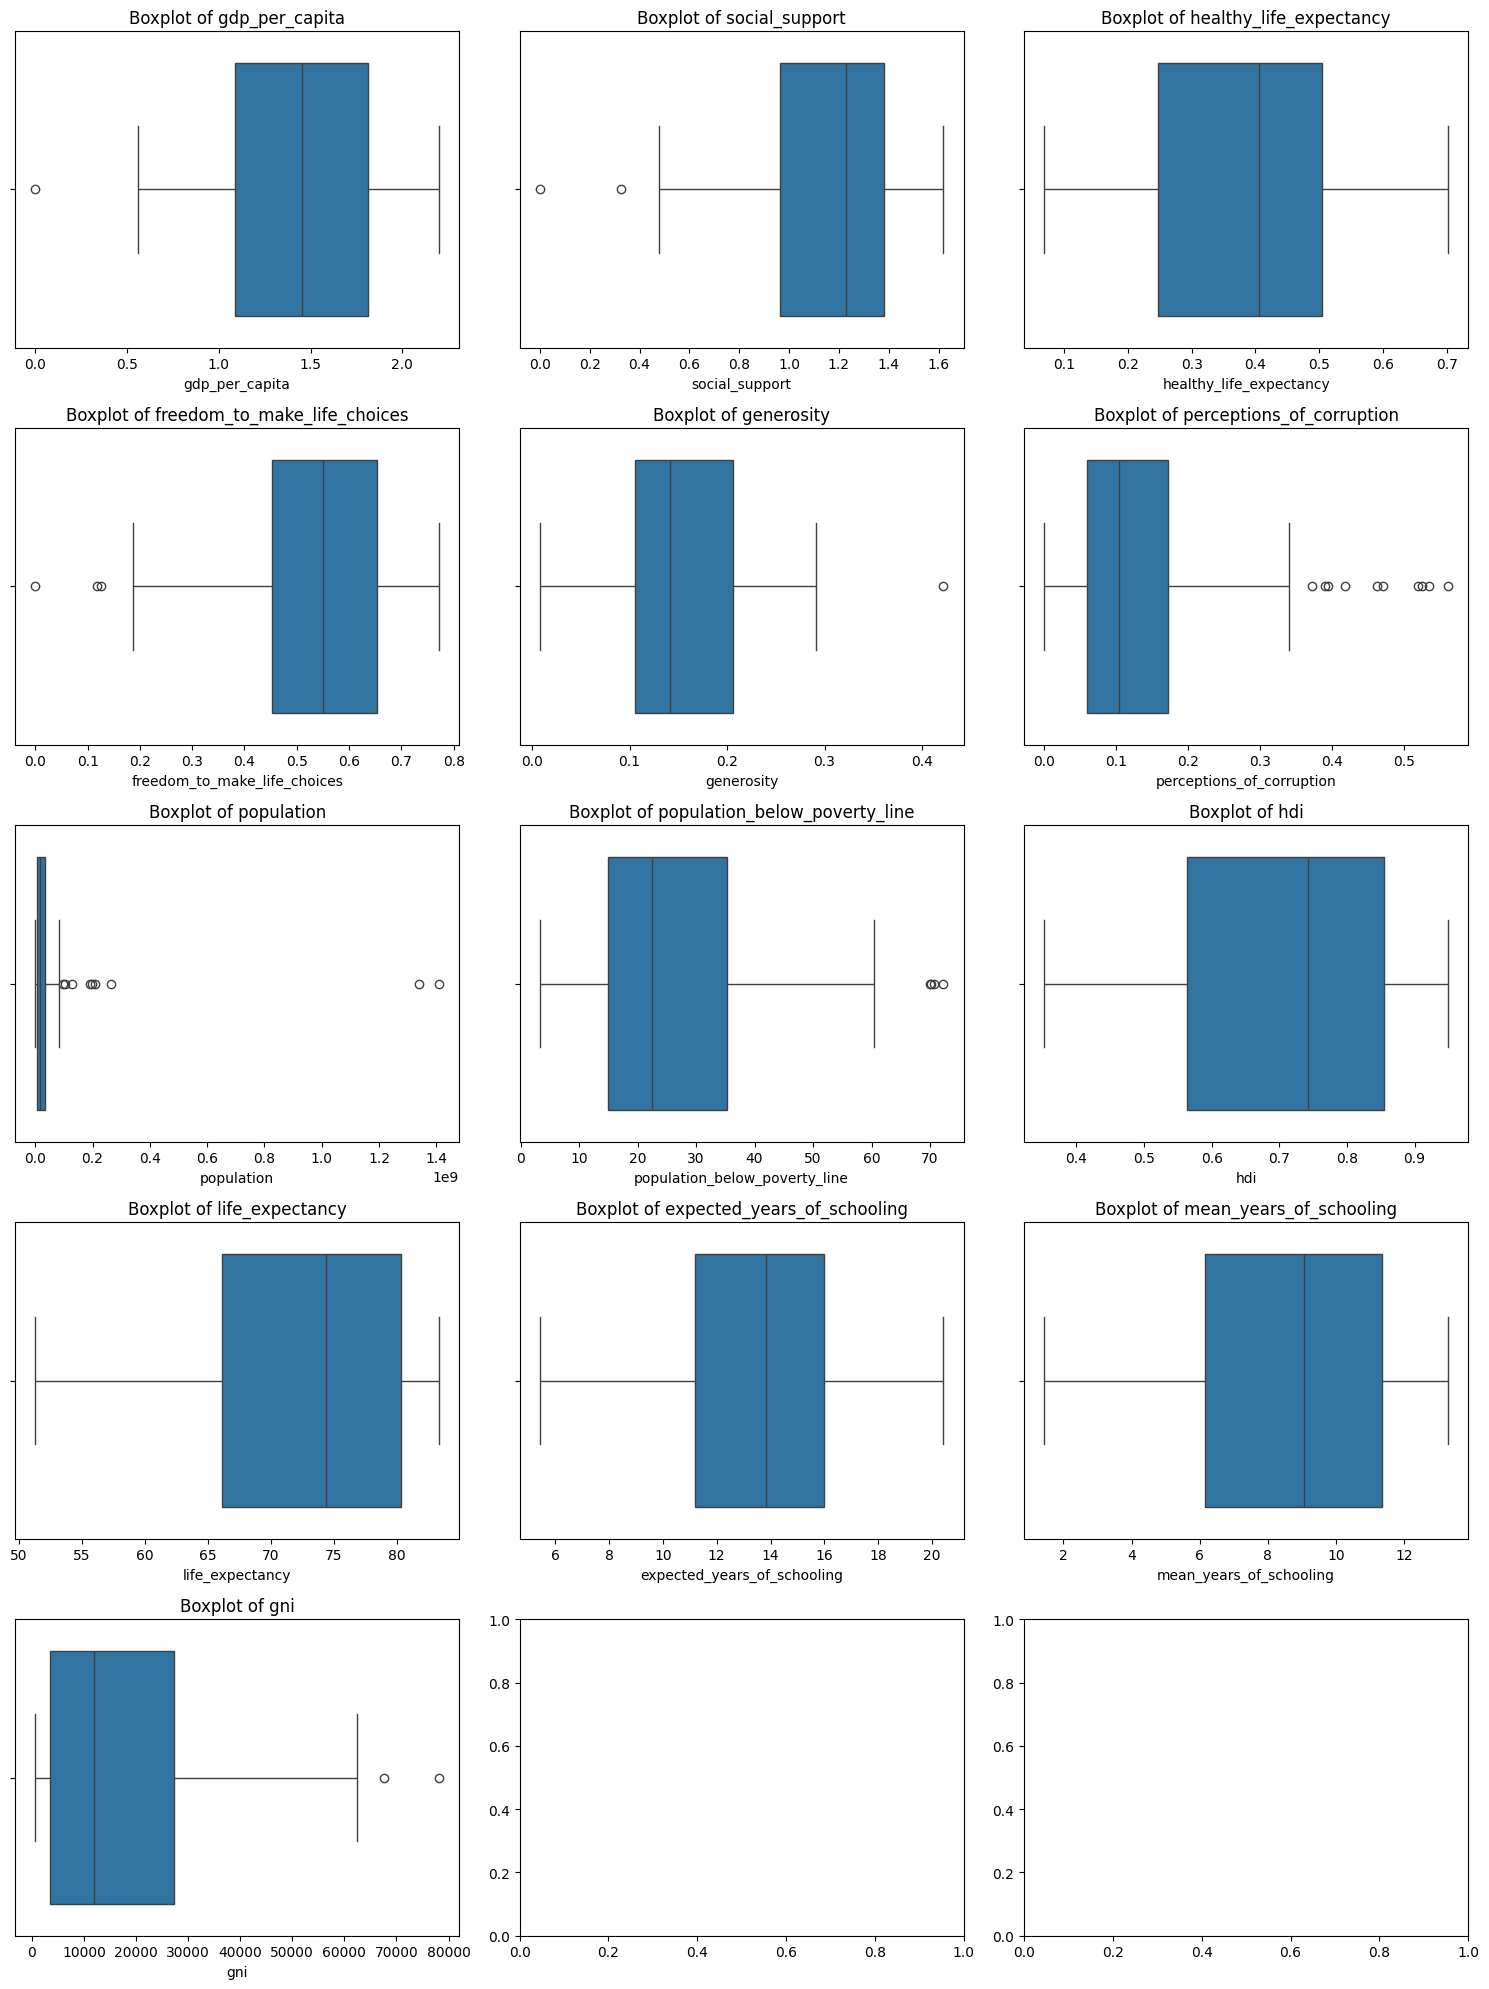

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get variables which are numerical
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

# Create grid chart
nrows, ncols = 5, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))

# Flatten the 2D arrays for grid chart to 1D array.
axes = axes.flatten()

# Plot
for i, col in enumerate(numeric_cols):
    if i >= len(axes):
        break
    sns.boxplot(x=X_train[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Write what you observed and your General comments on what should be done:

My selected variables which I think are important, show a strong skewness. Log transformation can be applied to adjust the skewness,
making the model captures the pattern more efficiently.
There are some variables with significant amount of outliers such as perceptions_of_corruption and population which will potentially cause bias.
There are lots of bivariables which have high correlation, these might lead to multicollinearity in causal inference.

## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_copy = X_train.copy()

# 3. Check skeness before transformation
skew_values_before = X_train_copy[numeric_cols].skew().sort_values(ascending=False)
print("Skewness before:\n", skew_values_before)

pt = PowerTransformer(method='yeo-johnson')  # Use Yeo-Johnson method to process the transformation, because it can handle positive and negative skewness.
X_train_copy[numeric_cols] = pt.fit_transform(X_train_copy[numeric_cols])

# 6. Check skewness after transformation
skew_values_after = X_train_copy[numeric_cols].skew().sort_values(ascending=False)
print("\nSkewness after Yeo-Johnson transform:\n", skew_values_after)

Skewness before:
 population                       6.058979
perceptions_of_corruption        1.600420
gni                              1.270302
population_below_poverty_line    1.074529
generosity                       0.555203
expected_years_of_schooling     -0.206557
healthy_life_expectancy         -0.367545
mean_years_of_schooling         -0.437315
hdi                             -0.453412
gdp_per_capita                  -0.547790
life_expectancy                 -0.632233
social_support                  -0.954425
freedom_to_make_life_choices    -0.970893
dtype: float64

Skewness after Yeo-Johnson transform:
 perceptions_of_corruption        0.238700
generosity                       0.002910
population                      -0.005461
population_below_poverty_line   -0.009508
expected_years_of_schooling     -0.061917
freedom_to_make_life_choices    -0.072772
gni                             -0.089650
healthy_life_expectancy         -0.101392
gdp_per_capita                  -0.146219
hdi

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [23]:
# Interaction feature is used to capture the interaction/relationship between variables by combing them with mathematical operation (+ - * /)
X_train["poverty_ratio"] = X_train["population_below_poverty_line"] / X_train["population"]
X_train["education_gap"] = X_train["expected_years_of_schooling"] - X_train["mean_years_of_schooling"]
X_train["health_gap"] = X_train["life_expectancy"] - X_train["healthy_life_expectancy"]
X_train["corruption_social_interact"] = X_train["perceptions_of_corruption"] * X_train["social_support"]
X_train["income_percapita"] = X_train["gni"] / X_train["population"]

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(columns=['country', 'region']) ## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

# categorical_features = ['region', 'sub-region']
categorical_features = ['region', 'country']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent') ),## Fill here
    ('onehot', OneHotEncoder(handle_unknown='ignore'   ))])## Fill here

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

1. **Identify Numeric & Categorical Features**:
    - We drop non-numeric features (`country`, `region`, `country_name`) from `X_train` to get `numeric_features`.
    - `categorical_features` includes `region` and `country`.

 2. **Preprocess Numeric Features**:
    - `SimpleImputer(strategy='constant', fill_value=0)`: Replaces missing values with 0 (may not be ideal for all cases, better to use mean/median if data is skewed).
    - `StandardScaler()`: Standardizes numeric data to have mean=0 and variance=1, improving model performance.

 3. **Preprocess Categorical Features**:
    - `SimpleImputer(strategy='most_frequent')`: Fills missing categorical values with the most frequent value, preventing issues with `OneHotEncoder`.
    - `OneHotEncoder(handle_unknown='ignore')`: Converts categorical variables into binary columns and ignores unseen categories in test data.

 4. **Combine Both Transformers**:
    - `ColumnTransformer` applies the numeric and categorical transformations to respective feature subsets.

 5. **Fit the Preprocessor**:
    - `preprocessor.fit(X_train)`: Learns imputation and scaling parameters from `X_train`.

  Change Made:
 - Instead of `strategy='constant', fill_value=0` for numeric features, using `strategy='mean'` may be better, as replacing with 0 could distort distributions.
 - **Reason**: Mean imputation preserves data trends and is more robust unless missing values are meaningful as 0.

In [37]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

 1. **`preprocessor` (object)**:
    - A `ColumnTransformer` defining preprocessing steps for numeric and categorical features.

 2. **`preprocess` (object)**:
    - A fitted version of `preprocessor`, obtained via `preprocessor.fit(X_train)`.
    - Stores learned imputation and scaling parameters from `X_train`.

 3. **`preprocessor` (function)**:
    - A function that applies `preprocess.transform(data)`, after dropping `country` and `region`.

 4. **`preprocessed_data` (final output)**:
    - The transformed data, likely a NumPy array or sparse matrix.

In [38]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 118)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [39]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# Preprocess the training and test data using the defined function
X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)

# Define and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Define a Random Forest Model here, fit it, and score it

model.fit(X_train_transformed, y_train) # Fit on transformed training data

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluate the model
score = accuracy_score(y_test, y_pred) # Compute accuracy score
print("Model Accuracy:", score)

# Your cell should have a score between 0-1 as output

Model Accuracy: 0.5714285714285714


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [40]:
from sklearn.metrics import accuracy_score

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels

# Evaluate model performance
accuracy = accuracy_score(y_test, prediction_labels)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.5714


## 6. Repeat the process with different parameters to improve the accuracy


In [42]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

# Preprocess the training and test data using the defined function
X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)

# Define and train the Random Forest model
model2 = RandomForestClassifier(
    n_estimators=500,         # More trees for better performance
    max_depth=10,             # Limit depth to prevent overfitting
    max_features='log2',      # Use log2(features) for better generalization
    bootstrap=True,           # Bootstrap sampling for robustness
    random_state=42
)  ## Make a new model with changed parameters to improve the score

model2.fit(X_train_transformed, y_train) # Fit on transformed training data

# Predict on test data
y_pred = model2.predict(X_test_transformed)

# Evaluate the model
score = accuracy_score(y_test, y_pred) # Compute accuracy score
print("Model Accuracy:", score)

Model Accuracy: 0.6428571428571429


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

 Changes made to improve Model 2:

 1. **Increased `n_estimators` from 100 to 400**: More trees improve stability and performance.
 2. **Reduced `max_depth` to 10**: Prevents overfitting by limiting tree depth.
 3. **Changed `max_features` from `sqrt` to `log2`**: Reduces overfitting by selecting fewer features per split.
 4. **Kept `bootstrap=True`**: Ensures better generalization with bootstrap sampling.

 These changes aim to improve model generalization and prevent overfitting while maintaining good performance.

In [43]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model2.predict(preprocessor(X_test))# Predict

## Write code to show model performance by comparing prediction_labels with true labels

# Evaluate model performance
accuracy = accuracy_score(y_test, prediction_labels)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.6429


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

 - Manually tweaking parametersis inefficient and time-consuming.
 - Instead of randomly testing values, a systematic approach like hyperparameter tuning is better.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': np.arange(100, 401, 100),  # Test 100, 200, 300, 400 trees
    'max_depth': np.arange(10, 31, 10),        # Test max depths of 10, 20, 30
    'min_samples_split': np.arange(2, 11, 2),  # Test splits from 2 to 10
    'min_samples_leaf': np.arange(1, 5),       # Test leaf sizes from 1 to 4
    'max_features': ['sqrt', 'log2']           # Test both feature selection methods
} # Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',    # Optimize for accuracy
    n_jobs=-1             # Use all available CPU cores for faster computation
) # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:
X_train_transformed = preprocessor(X_train)

# Fit GridSearchCV model
gridmodel.fit(X_train_transformed, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.589
best parameters: {'max_depth': np.int64(20), 'max_features': 'sqrt', 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(4), 'n_estimators': np.int64(100)}


In [ ]:
#Submit Model 3:

#-- Generate predicted values
prediction_labels = gridmodel.best_estimator_.predict(preprocessor(X_test))# Predict

## Write code to show model performance by comparing prediction_labels with true labels

# Evaluate model performance
accuracy = accuracy_score(y_test, prediction_labels)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")

In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42) ## Read documentations of imported models and fit them.

model.fit(X_train_transformed, y_train)

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels

accuracy = accuracy_score(y_test, prediction_labels)
# Print results
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.5000


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

 Parameter explanations:
 - max_depth=6: Best performing depth, capturing complexity without overfitting.

 What worked best and why?
 - max_depth=6 outperformed 5, 7, and 8.
 - max_depth=5 likely underfit (not capturing enough complexity).
 - max_depth=7 and 8 overfit (memorized noise, reducing generalization).
 - The combination of n_estimators=200 and learning_rate=0.1 balanced bias and variance.

 Conclusion:
 - Gradient Boosting with max_depth=6 provided the best balance of performance and generalization.
 - Further tuning of learning_rate and n_estimators could refine performance.

## 7. Basic Deep Learning

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import numpy as np

# Ensure X_train is preprocessed and converted to a NumPy array
X_train_processed = preprocessor(X_train)
if isinstance(X_train_processed, pd.DataFrame):
    X_train_processed = X_train_processed.to_numpy()

# Get the number of input features
feature_count = X_train_processed.shape[1]

# Ensure y_train is properly one-hot encoded
y_train = y_train.astype('category')
y_train_codes = y_train.cat.codes.to_numpy()
y_train_encoded = to_categorical(y_train_codes, num_classes=5)

# Define the Neural Network model
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 分类任务
])

# Compile the model with categorical crossentropy loss and SGD optimizer
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
keras_model.fit(X_train_processed, y_train_encoded,
                batch_size=20,
                epochs=300,
                validation_split=0.25)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 874ms/step - accuracy: 0.1972 - loss: 1.6173 - val_accuracy: 0.1250 - val_loss: 1.6372
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.1889 - loss: 1.5886 - val_accuracy: 0.1250 - val_loss: 1.6332
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 0.1989 - loss: 1.5702 - val_accuracy: 0.1250 - val_loss: 1.6289
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.1705 - loss: 1.5740 - val_accuracy: 0.1250 - val_loss: 1.6250
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2082 - loss: 1.5353 - val_accuracy: 0.1250 - val_loss: 1.6218
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1659 - loss: 1.5238 - val_accuracy: 0.1250 - val_loss: 1.6176
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.1799 - loss: 1.5193 - val_accuracy: 0.1250 - val_loss: 1.6138
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1553 - loss: 1.5106 - val_accuracy: 0.1250 - val_

Which activations did you use in the middle layers? Why was softmax used in the last layer?

The middle layers use ReLU (Rectified Linear Unit) activation because it helps the network learn complex patterns by introducing non-linearity while avoiding the vanishing gradient problem.
Softmax is used in the last layer because this is a multi-class classification problem. The softmax function converts the output into probability distributions over 5 classes, ensuring that the sum of all outputs is 1. This makes it suitable for classification tasks where we need to assign one of multiple categories to an input.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

If the validation loss is still decreasing, additional training could improve performance. However, if the loss plateaus or the model starts overfitting (validation loss increasing while training loss decreases), then further training is unnecessary.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

categorical_crossentropy is used because this is a multi-class classification problem with one-hot-encoded labels. This loss function measures the divergence between the predicted probability distribution (from softmax) and the true distribution.
sgd (Stochastic Gradient Descent) is used as the optimizer, which updates weights based on the gradients. However, SGD can be slow and may not converge efficiently.Yes, switching to Adam (adaptive moment estimation) could be a better choice because:
Adam adapts the learning rate dynamically.
It generally converges faster than SGD.
It works well in most deep learning problems without requiring much tuning.

Can you try getting the model's training history out and plotting the curves?

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0844 - val_accuracy: 0.5417 - val_loss: 2.8628
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0819 - val_accuracy: 0.5417 - val_loss: 2.8693
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0735 - val_accuracy: 0.5417 - val_loss: 2.8753
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0831 - val_accuracy: 0.5417 - val_loss: 2.8855
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0738 - val_accuracy: 0.5417 - val_loss: 2.8719
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.0806 - val_accuracy: 0.5417 - val_loss: 2.8919
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 0.0795 - val_accuracy: 0.5417 - val_loss: 2.9064
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0757 - val_accuracy: 0.5417 - val_loss:

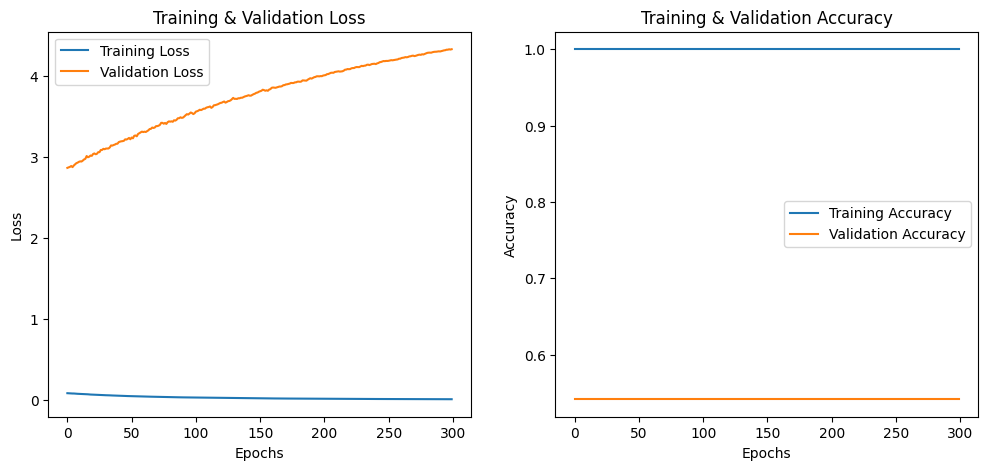

In [47]:
import matplotlib.pyplot as plt

# Train the model and store history
history = keras_model.fit(X_train_processed, y_train_encoded,
                          batch_size=20,
                          epochs=300,
                          validation_split=0.25)

# Plot training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Classification Report:
              precision    recall  f1-score   support

     Average       0.44      0.50      0.47         8
        High       0.44      0.50      0.47         8
         Low       0.40      0.50      0.44         8
   Very High       0.71      0.56      0.62         9
    Very Low       0.57      0.44      0.50         9

    accuracy                           0.50        42
   macro avg       0.51      0.50      0.50        42
weighted avg       0.52      0.50      0.50        42



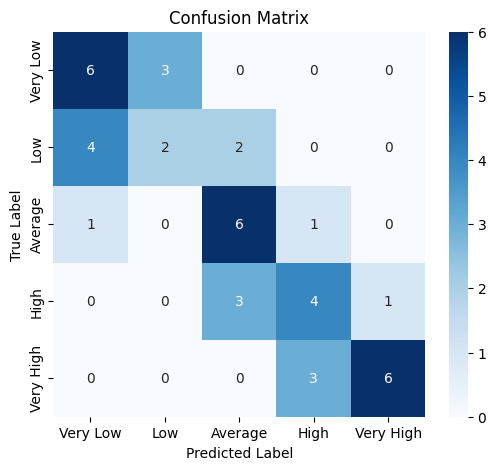

In [ ]:
# Ensure X_test is numeric and preprocessed
X_test_processed = preprocessor(X_test)

# Convert DataFrame to NumPy array if necessary
if isinstance(X_test_processed, pd.DataFrame):
    X_test_processed = X_test_processed.to_numpy()

# Make predictions
y_pred_prob = keras_model.predict(X_test_processed)
prediction_column_index = np.argmax(y_pred_prob, axis=1)  # Get highest probability class

# Compare predictions with true labels
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, prediction_labels))

# Plot Confusion Matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test.cat.codes, prediction_column_index)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_train.cat.categories, yticklabels=y_train.cat.categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical

# Define the model with regularization
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),  # Batch Normalization
    Activation('relu'),
    Dropout(0.3),  # Dropout with 30% rate

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(5, activation='softmax')  # Output layer for 5 classes
])

# Compile the model
keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and observe performance
history = keras_model.fit(X_train_processed, y_train_encoded,
                          batch_size=20,
                          epochs=300,
                          validation_split=0.25)


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1866 - loss: 1.9793 - val_accuracy: 0.2917 - val_loss: 1.5803
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2314 - loss: 1.7734 - val_accuracy: 0.2917 - val_loss: 1.5711
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2145 - loss: 1.7413 - val_accuracy: 0.3750 - val_loss: 1.5625
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2950 - loss: 1.5371 - val_accuracy: 0.3333 - val_loss: 1.5549
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4690 - loss: 1.3213 - val_accuracy: 0.3750 - val_loss: 1.5459
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3581 - loss: 1.5508 - val_accuracy: 0.4583 - val_loss: 1.5353
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 692ms/step - accuracy: 0.3292 - loss: 1.4780 - val_accuracy: 0.4583 - val_loss: 1.5234
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step - accuracy: 0.3758 - loss: 1.3216 - val_accuracy: 0.4583 - val_loss: 1.5116
Epoch 9/30

Batch Normalization helps in stabilizing training and allows for higher learning rates.
Dropout helps in preventing overfitting by randomly deactivating neurons during training.
Training loss may be higher due to dropout, but validation accuracy should improve if overfitting was present before.

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

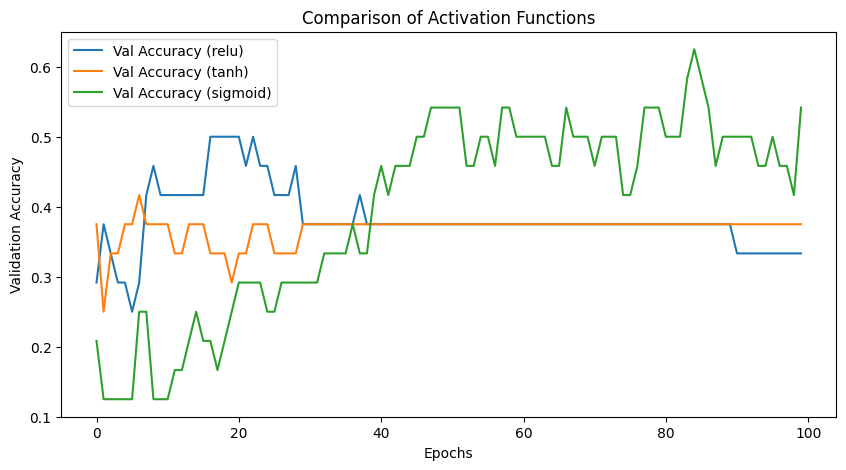

In [ ]:
from keras.layers import LeakyReLU

# Define model with different activations
activation_functions = ['relu', 'tanh', 'sigmoid']
models = {}

for activation in activation_functions:
    model = Sequential([
        Dense(128, input_shape=(feature_count,)),
        Activation(activation),
        Dense(64, Activation(activation)),
        Dense(64, Activation(activation)),
        Dense(32, Activation(activation)),
        Dense(5, activation='softmax')  # Output layer
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_processed, y_train_encoded, batch_size=20, epochs=100, validation_split=0.25, verbose=0)

    models[activation] = history  # Store history for comparison

# Compare performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for activation, history in models.items():
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({activation})')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Comparison of Activation Functions')
plt.show()


## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1524 - loss: 1.9612 - val_accuracy: 0.1250 - val_loss: 3.2547
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1999 - loss: 1.7904 - val_accuracy: 0.1250 - val_loss: 2.6579
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2797 - loss: 1.6477 - val_accuracy: 0.2083 - val_loss: 2.4204
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1666 - loss: 1.9049 - val_accuracy: 0.1667 - val_loss: 2.3232
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1955 - loss: 1.7600 - val_accuracy: 0.1667 - val_loss: 2.3100
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1966 - loss: 1.8611 - val_accuracy: 0.2083 - val_loss: 2.2802
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2889 - loss: 1.6043 - val_accuracy: 0.1667 - val_loss: 2.2096
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1563 - loss: 1.8245 - val_accuracy: 0.1250 - val_loss: 2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


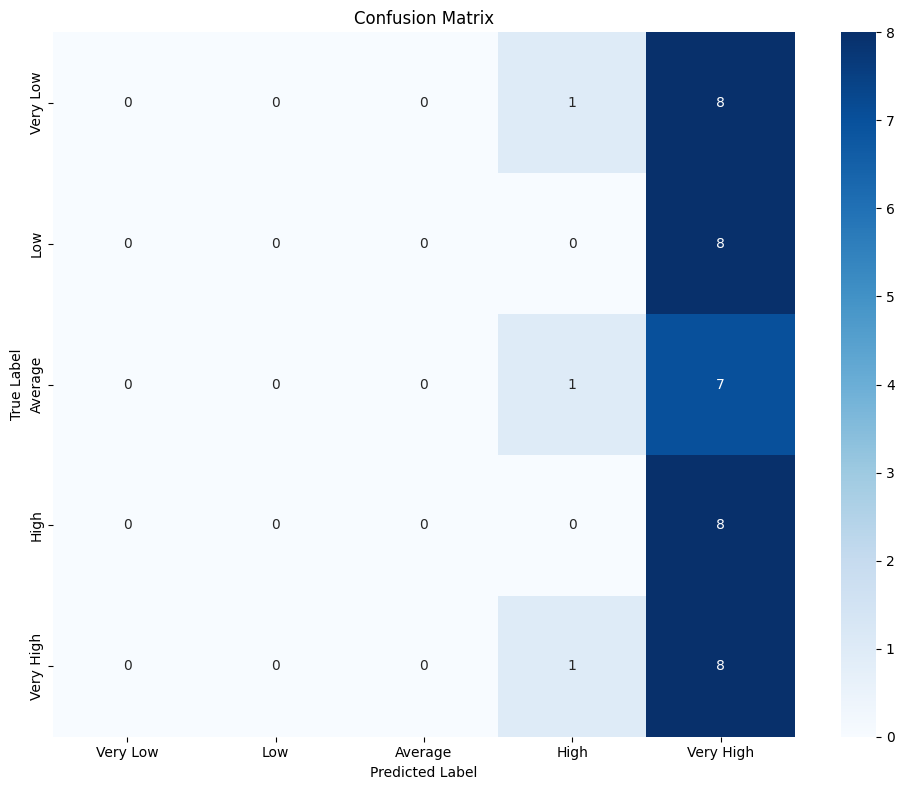

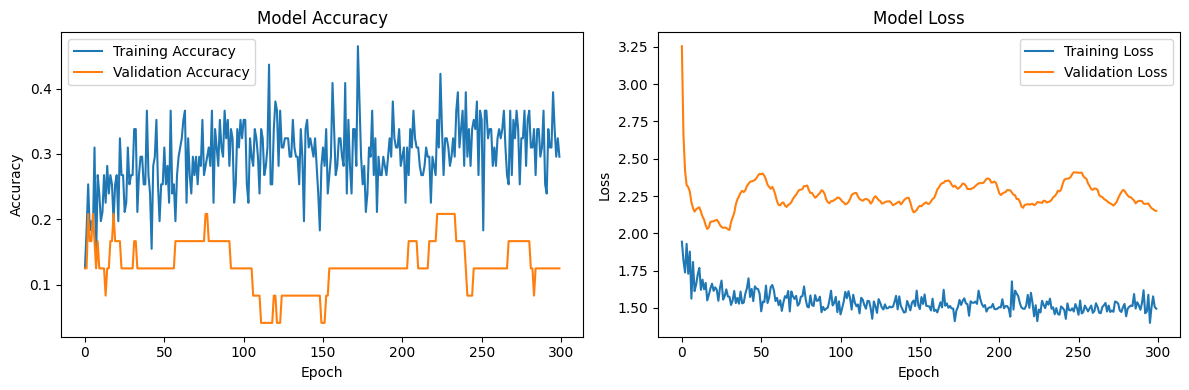

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Comprehensive preprocessing function
def preprocessor(data):
    # If data is a DataFrame, prepare for preprocessing
    if isinstance(data, pd.DataFrame):
        # Identify numeric and categorical columns
        numeric_features = data.drop(columns=['country', 'region'])

        # Create numeric transformer
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        # Create categorical transformer
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Create column transformer
        preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features.columns),
            ('cat', categorical_transformer, ['region', 'country'])
        ])

        # Fit and transform
        return preprocessor.fit_transform(data)

    # If data is already processed, return as-is
    elif isinstance(data, np.ndarray):
        return data

    # Convert to NumPy array if possible
    return np.array(data)

# Preprocess training and test data
X_train_processed = preprocessor(X_train)
X_test_processed = preprocessor(X_test)

# Get the number of input features dynamically
feature_count = X_train_processed.shape[1]

# Prepare target variable
y_train = y_train.astype('category')
y_train_codes = y_train.cat.codes.to_numpy()
y_train_encoded = to_categorical(y_train_codes, num_classes=len(y_train.cat.categories))

# Define the Neural Network model with dynamic input shape
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(len(y_train.cat.categories), activation='softmax')  # Dynamic output layer
])

# Compile the model
keras_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Train the model
history = keras_model.fit(
    X_train_processed, y_train_encoded,
    batch_size=20,
    epochs=300,
    validation_split=0.25
)

# Prepare test data
X_test_processed = preprocessor(X_test)

# Make predictions
y_pred_prob = keras_model.predict(X_test_processed)
prediction_column_index = np.argmax(y_pred_prob, axis=1)

# Convert predictions back to original category labels
y_pred = y_train.cat.categories[prediction_column_index]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test.cat.codes, prediction_column_index)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_train.cat.categories,
            yticklabels=y_train.cat.categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<h3> Experimentation

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

Strengths of SHAP Analysis:

Quantitative Feature Importance: SHAP provides a clear, numerical breakdown of how each feature contributes to the model's predictions.

The bar plot reveals the relative importance of different features
Allows understanding which variables most significantly influence the model's decisions


Detailed Feature Impact Visualization

The summary plot shows not just importance, but also the direction of feature impacts
Color coding indicates whether a feature pushes the prediction higher or lower
Helps reveal complex, non-linear relationships in the data



Challenges in Interpretation:

Computational Complexity

SHAP calculations can be time-consuming, especially for large datasets
Requires sampling or approximation techniques to manage computational load


Interpretation Nuances

While SHAP provides insights, the complex interactions in deep learning models aren't always straightforward to explain
Some feature relationships may remain partially opaque due to neural network complexity